# Challenge Description 

You are looking at data from an e-commerce website. The site is very simple and has just 4
pages:
The first page is the home page. When you come to the site for the first time, you can
only land on the home page as a first page.
From the home page, the user can perform a search and land on the search page.
From the search page, if the user clicks on a product, she will get to the payment page,
where she is asked to provide payment information in order to buy that product.
If she does decide to buy, she ends up on the confirmation page
The company CEO isn't very happy with the volume of sales and, especially, of sales coming
from new users. Therefore, she asked you to investigate whether there is something wrong in
the conversion funnel or, in general, if you could suggest how conversion rate can be improved.

### Our goal

1. A full picture of funnel conversion rate for both desktop and mobile
2. Some insights on what the product team should focus on in order to improve
conversion rate as well as anything you might discover that could help improve
conversion rate.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [60]:
user_data = pd.read_csv('day5_1.csv',parse_dates = ['date'])
home_data = pd.read_csv('day5_2.csv')
confirmation_data = pd.read_csv('day5_3.csv')
payment_data = pd.read_csv('day5_4.csv')
search_data = pd.read_csv('day5_5.csv')

In [61]:
user_data.head(5)

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [62]:
home_data.head(5)

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [63]:
data = pd.merge(user_data,home_data,on = 'user_id',how = 'left')
data = pd.merge(data,search_data,on = 'user_id',how = 'left',suffixes=('_home', '_search'))
data = pd.merge(data,payment_data,on = 'user_id',how = 'left')
data = pd.merge(data,confirmation_data,on = 'user_id',how = 'left',suffixes=('_payment', '_confirmation'))

In [64]:
data.head(5)

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id              90400 non-null int64
date                 90400 non-null datetime64[ns]
device               90400 non-null object
sex                  90400 non-null object
page_home            90400 non-null object
page_search          45200 non-null object
page_payment         6030 non-null object
page_confirmation    452 non-null object
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 6.2+ MB


In [66]:
data['page_confirmation'].unique()

array([nan, 'payment_confirmation_page'], dtype=object)

In [67]:
data['page_home'] = data['page_home'].apply(lambda x: 1 if x =='home_page' else 0.0)
data['page_search'] = data['page_search'].apply(lambda x: 1 if x =='search_page' else 0.0)
data['page_payment'] = data['page_payment'].apply(lambda x: 1 if x == 'payment_page' else 0.0)
data['page_confirmation'] = data['page_confirmation'].apply(lambda x: 1 if x == 'payment_confirmation_page' else 0.0)

In [68]:
data.head(5)

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,1,0.0,0.0,0.0
1,756838,2015-01-13,Desktop,Male,1,0.0,0.0,0.0
2,568983,2015-04-09,Desktop,Male,1,1.0,0.0,0.0
3,190794,2015-02-18,Desktop,Female,1,1.0,0.0,0.0
4,537909,2015-01-15,Desktop,Male,1,0.0,0.0,0.0


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id              90400 non-null int64
date                 90400 non-null datetime64[ns]
device               90400 non-null object
sex                  90400 non-null object
page_home            90400 non-null int64
page_search          90400 non-null float64
page_payment         90400 non-null float64
page_confirmation    90400 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 6.2+ MB


In [70]:
data.describe()

,user_id,page_home,page_search,page_payment,page_confirmation
count,90400.000000,90400.0,90400.000000,90400.000000,90400.000000
mean,498709.683473,1.0,0.500000,0.066704,0.005000
std,289040.674085,0.0,0.500003,0.249509,0.070534
min,17.000000,1.0,0.000000,0.000000,0.000000
25%,247978.750000,1.0,0.000000,0.000000,0.000000
50%,498267.000000,1.0,0.500000,0.000000,0.000000
75%,749789.250000,1.0,1.000000,0.000000,0.000000
max,999979.000000,1.0,1.000000,1.000000,1.000000


### Conversion rate funnel for entire procemss across all devices

In [71]:
### Conversion rate funnel for entire process
print('home_page' + '\t' + 'seach_page' + '\t' + 'payment_page' + '\t' +'page_confirmation')
print( str(data.page_home.mean()) + '\t\t'+ str(data.page_search.mean()) + '\t\t' + str(round(data.page_payment.mean(),3))+ '\t\t' + str(data.page_confirmation.mean()))

home_page	seach_page	payment_page	page_confirmation
1.0		0.5		0.067		0.005


### Conversion rate funnel for entire process on different devices

In [72]:
funnel_mean = data.groupby('device').mean()
funnel_mean

,user_id,page_home,page_search,page_payment,page_confirmation
device,,,,,
Desktop,498484.582492,1.0,0.5,0.05,0.002492
Mobile,499158.394702,1.0,0.5,0.10,0.010000


### Conversion rate funnel for each process on different devices

In [73]:
funnel_count = data.groupby('device').sum()
funnel_count['search/homepage'] = funnel_count['page_search']/funnel_count['page_home']
funnel_count['payment/search'] = funnel_count['page_payment']/funnel_count['page_search']
funnel_count['confirmation/payment'] = funnel_count['page_confirmation']/funnel_count['page_payment']
funnel_count_rate = funnel_count.iloc[:,-4:]

In [74]:
funnel_count.head(5)

,user_id,page_home,page_search,page_payment,page_confirmation,search/homepage,payment/search,confirmation/payment
device,,,,,,,,
Desktop,30008771866,60200,30100.0,3010.0,150.0,0.5,0.1,0.049834
Mobile,15074583520,30200,15100.0,3020.0,302.0,0.5,0.2,0.100000


In [75]:
funnel_count_rate = funnel_count_rate.reset_index()
funnel_count_rate

,device,page_confirmation,search/homepage,payment/search,confirmation/payment
0,Desktop,150.0,0.5,0.1,0.049834
1,Mobile,302.0,0.5,0.2,0.100000


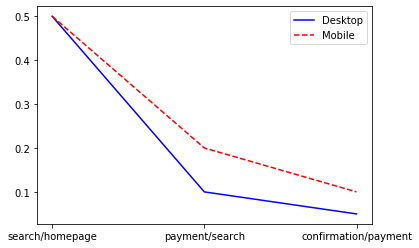

In [76]:
plt.plot(funnel_count_rate.iloc[0,2:].index.tolist(),funnel_count_rate.iloc[0,2:].values.tolist(),'-b',label = 'Desktop')
plt.plot(funnel_count_rate.iloc[1,2:].index.tolist(),funnel_count_rate.iloc[1,2:].values.tolist(),'--r',label = 'Mobile')
plt.legend()

In [77]:
funnel_count_count = funnel_count.iloc[:,1:5].transpose().reset_index()
cleaned = pd.melt(funnel_count_count,id_vars=['index'],value_vars = ['Desktop','Mobile'])
cleaned.columns = ['stage', 'device','count']
cleaned.head(5)

,stage,device,count
0,page_home,Desktop,60200.0
1,page_search,Desktop,30100.0
2,page_payment,Desktop,3010.0
3,page_confirmation,Desktop,150.0
4,page_home,Mobile,30200.0


In [78]:
fig = px.funnel(cleaned , x='count', y='stage', color='device')
fig.show()

#### In this case, we can find that more people are using desktop to land on their home page, which is twice as mobile users. However, mobile user's conversion rates are higher in stages from search to payment and from payment to confirmation. Thus, we will recommend engineering team to optimize the ux design of desktop version since most of people are from desktop source.

### Explore other features

### Sex

In [79]:
data.head(5)

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,1,0.0,0.0,0.0
1,756838,2015-01-13,Desktop,Male,1,0.0,0.0,0.0
2,568983,2015-04-09,Desktop,Male,1,1.0,0.0,0.0
3,190794,2015-02-18,Desktop,Female,1,1.0,0.0,0.0
4,537909,2015-01-15,Desktop,Male,1,0.0,0.0,0.0


In [80]:
sex_funnel = data.groupby('sex').sum()
sex_funnel_t = sex_funnel.transpose().reset_index().loc[1:,].melt(id_vars = 'index',value_vars = ['Female','Male'])
sex_funnel_t.columns = ['stage','sex','count']

In [81]:
sex_funnel_t

,stage,sex,count
0,page_home,Female,45075.0
1,page_search,Female,22676.0
2,page_payment,Female,3100.0
3,page_confirmation,Female,241.0
4,page_home,Male,45325.0
5,page_search,Male,22524.0
6,page_payment,Male,2930.0
7,page_confirmation,Male,211.0


In [82]:
from plotly import graph_objects as go
fig = px.funnel()
fig.add_trace(go.Funnel(
    name = 'Male',
    y = sex_funnel_t.loc[4:8,'stage'],
    x = sex_funnel_t.loc[4:8,'count'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Female',
    y = sex_funnel_t.loc[:3,'stage'],
    x = sex_funnel_t.loc[:3,'count'],
    textinfo = "value+percent initial"))

fig.show()

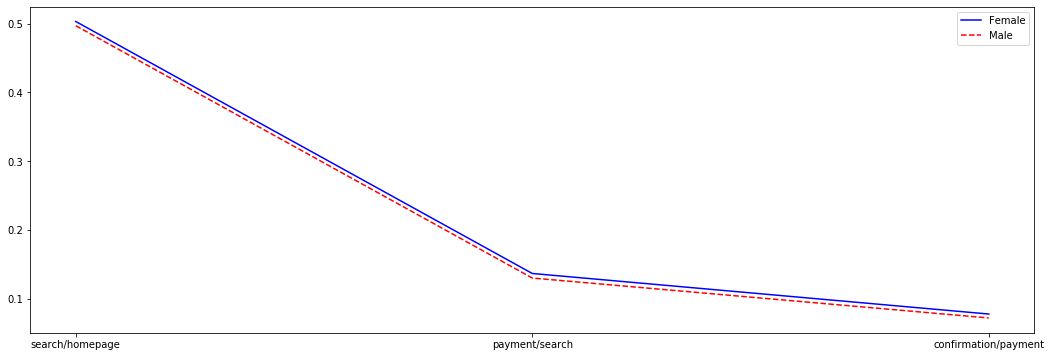

In [83]:
sex_funnel['search/homepage'] = sex_funnel['page_search']/sex_funnel['page_home']
sex_funnel['payment/search'] = sex_funnel['page_payment']/sex_funnel['page_search']
sex_funnel['confirmation/payment'] = sex_funnel['page_confirmation']/sex_funnel['page_payment']
fig,ax= plt.subplots(1,1,figsize = (18,6))
plt.plot(sex_funnel.iloc[0,5:].index.tolist(),sex_funnel.iloc[0,5:].values.tolist(),'-b',label = 'Female')
plt.plot(sex_funnel.iloc[1,5:].index.tolist(),sex_funnel.iloc[1,5:].values.tolist(),'--r',label = 'Male')
plt.legend()

#### The trend of conversion rate of both female and male are basically the same

### Date

In [84]:
print(max(data.date))
print(min(data.date))

2015-04-30 00:00:00
2015-01-01 00:00:00


In [85]:
date_group = data.groupby('date').sum()
date_group

,user_id,page_home,page_search,page_payment,page_confirmation
date,,,,,
2015-01-01,370222931,712,436.0,76.0,6.0
2015-01-02,367816380,721,447.0,84.0,5.0
2015-01-03,389015069,760,422.0,64.0,7.0
2015-01-04,360536679,713,447.0,76.0,7.0
2015-01-05,386553813,754,462.0,88.0,11.0
...,...,...,...,...,...
2015-04-26,384071273,792,307.0,25.0,1.0
2015-04-27,403548676,779,311.0,26.0,1.0
2015-04-28,365677117,736,304.0,25.0,1.0


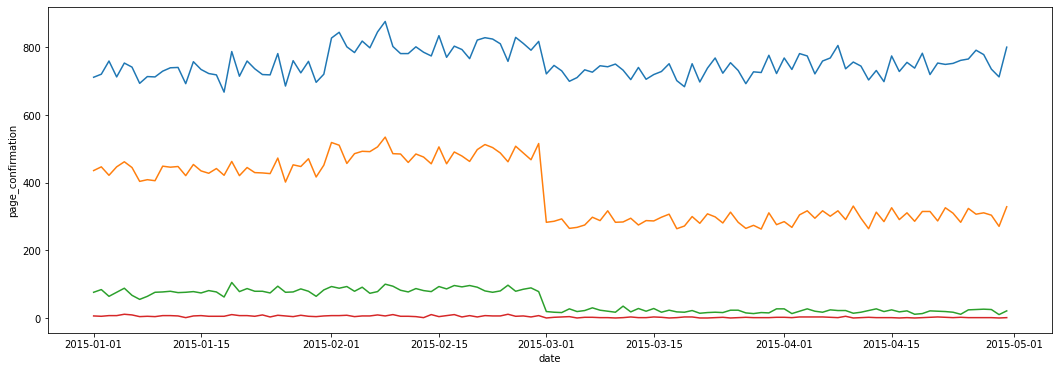

In [89]:
fig,ax = plt.subplots(1,1,figsize = (18,6))
sns.lineplot(x=date_group.index, y="page_home",data=date_group)
sns.lineplot(x=date_group.index, y="page_search",data=date_group)
sns.lineplot(x=date_group.index, y="page_payment",data=date_group)
sns.lineplot(x=date_group.index, y="page_confirmation",data=date_group)

#### We can find at the mid of this quarter, there happens a strong decrease of the count of conversions, especially at search and payment stage.

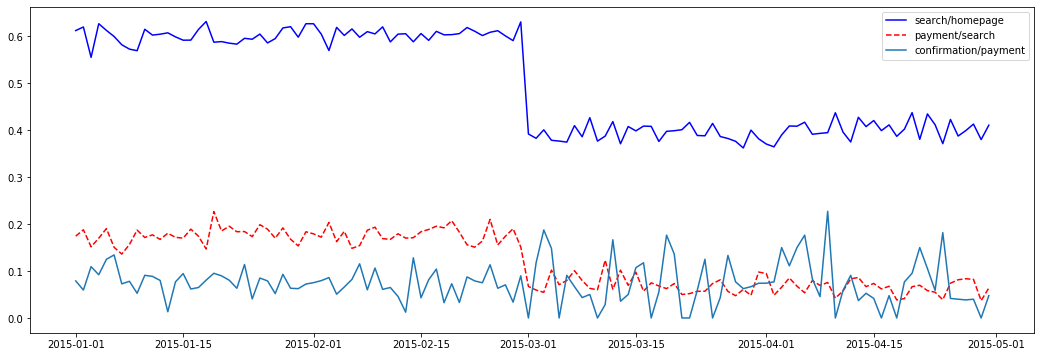

In [110]:
fig,ax = plt.subplots(1,1,figsize = (18,6))
date_group['search/homepage'] = date_group['page_search']/date_group['page_home']
date_group['payment/search'] = date_group['page_payment']/date_group['page_search']
date_group['confirmation/payment'] = date_group['page_confirmation']/date_group['page_payment']
plt.plot(date_group.index, date_group["search/homepage"],'-b',label = 'search/homepage')
plt.plot(date_group.index, date_group["payment/search"],'--r',label = 'payment/search')
plt.plot(date_group.index, date_group["confirmation/payment"],label = 'confirmation/payment')
plt.legend()

#### In terms of Conversion rate, the obvious gap happens in 2015-03-01, less people are willing to move from search to home page. Thus, we are able to make some assumption that there are some machine trouble or server trouble. Let's dig into that.m

In [121]:
date_device_group = data.groupby(['date','device']).sum()
date_device_group['search/homepage'] = date_device_group['page_search']/date_device_group['page_home']
date_device_group['payment/search'] = date_device_group['page_payment']/date_device_group['page_search']
date_device_group['confirmation/payment'] = date_device_group['page_confirmation']/date_device_group['page_payment']
date_device_group = date_device_group.reset_index()
date_device_group.head(5)

,date,device,user_id,page_home,page_search,page_payment,page_confirmation,search/homepage,payment/search,confirmation/payment
0,2015-01-01,Desktop,255226828,493,256.0,47.0,1.0,0.519270,0.183594,0.021277
1,2015-01-01,Mobile,114996103,219,180.0,29.0,5.0,0.821918,0.161111,0.172414
2,2015-01-02,Desktop,250737151,484,261.0,44.0,1.0,0.539256,0.168582,0.022727
3,2015-01-02,Mobile,117079229,237,186.0,40.0,4.0,0.784810,0.215054,0.100000
4,2015-01-03,Desktop,265042744,507,222.0,22.0,3.0,0.437870,0.099099,0.136364


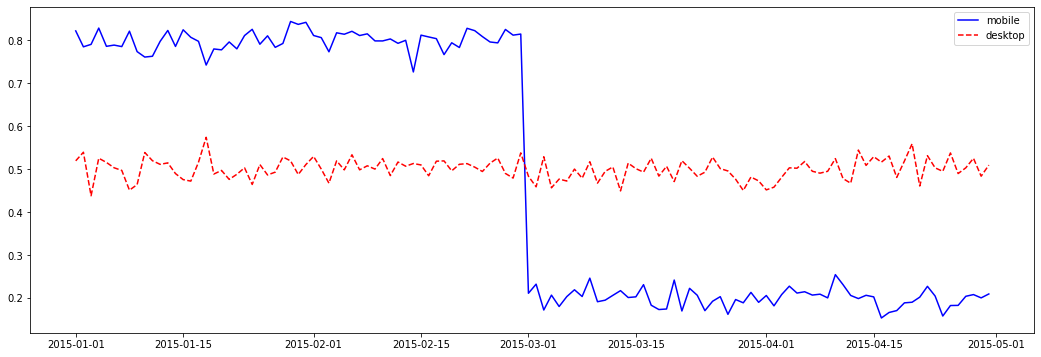

In [125]:
fig,ax = plt.subplots(1,1,figsize = (18,6))
mobile = date_device_group[date_device_group['device'] == 'Mobile']
desktop = date_device_group[date_device_group['device'] == 'Desktop']
plt.plot(mobile.date, mobile["search/homepage"],'-b',label = 'mobile')
plt.plot(desktop.date, desktop["search/homepage"],'--r',label = 'desktop')

plt.legend()

#### From above chart, we can find that the mobile version may happen some trouble. We suggest engineering team to fix it immediately.

### Summary

#### 1. Optimize the ux design and usage process at the stage of payment and confirmation on desktop version
More people landed their first homepage on desktop version, but the conversion rate, especially at the stage of payment and confirmation, are much smaller than mobile users

#### 2. Expand the advertisement on mobile version users.
Mobile version users conversion rate is pretty high at the key stages, which are payment and confirmation. If company want to improve the monetization capability, expand the mobile version users.

#### 3. Troubleshoot the mobile version's bug or optimze the search engine.
Since from 2015-03-01, there is an obvious gap in usage procedure from homepage to search. We need to dig into that to investigate the reasons behind. The reason may come from servers or search engines trouble.